**renaming images**

In [1]:
import os

def rename_images(folder_path, prefix):
    """
    Renames images and their corresponding masks in a folder.

    Args:
        folder_path (str): Path to the dataset folder.
        prefix (str): Prefix to use for renamed files (e.g., 'rgb' or 'gray').
    """
    # List all files
    files = os.listdir(folder_path)

    # Separate images and masks
    images = sorted([f for f in files if f.endswith('.jpg')])
    masks = sorted([f for f in files if f.endswith('.png') and 'mask' in f])

    print(f"Found {len(images)} images and {len(masks)} masks in {folder_path}")

    # Rename images and masks
    for idx, img_file in enumerate(images, start=1):
        img_ext = os.path.splitext(img_file)[1]
        mask_file = img_file.replace(img_ext, "_mask.png")

        new_img_name = f"{prefix}_{idx:04d}.jpg"
        new_mask_name = f"{prefix}_{idx:04d}_mask.png"

        # Rename image
        os.rename(os.path.join(folder_path, img_file), os.path.join(folder_path, new_img_name))

        # Rename mask if it exists
        if mask_file in masks:
            os.rename(os.path.join(folder_path, mask_file), os.path.join(folder_path, new_mask_name))

# Paths
rgb_path = "/content/drive/MyDrive/dataset ver_03/rgb/train"
gray_path = "/content/drive/MyDrive/dataset ver_03/gray/train"

# Rename files
rename_images(rgb_path, "rgb")
rename_images(gray_path, "gray")

print("Renaming complete!")


Found 51 images and 51 masks in /content/drive/MyDrive/dataset ver_03/rgb/train
Found 66 images and 66 masks in /content/drive/MyDrive/dataset ver_03/gray/train
Renaming complete!


**to download the dataset**

In [2]:
from google.colab import files
import shutil
import os

# Paths to your datasets
dataset_path = "/content/drive/MyDrive/dataset ver_03"
zip_path = "/content/dataset_ver_03.zip"

# Zip the entire dataset folder
shutil.make_archive("/content/dataset_ver_03", 'zip', dataset_path)

# Download the zip
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**to convert the grayscaled images into rgb**

In [3]:
import cv2
import os

# Path to your gray images folder
gray_folder = "/content/drive/MyDrive/dataset ver_03/gray/train"
output_folder = "/content/drive/MyDrive/dataset ver_03/gray/train_3ch"

# Make output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop over images
for filename in os.listdir(gray_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(gray_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read grayscale
        img_3ch = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)   # convert to 3 channels

        # Save to new folder
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, img_3ch)

print("All grayscale images converted to 3-channel and saved to:", output_folder)


All grayscale images converted to 3-channel and saved to: /content/drive/MyDrive/dataset ver_03/gray/train_3ch


**to merge all the images into one folder `merged`**

In [4]:
import os
import shutil

# Paths
gray_3ch_folder = "/content/drive/MyDrive/dataset ver_03/gray/train_3ch"
rgb_folder = "/content/drive/MyDrive/dataset ver_03/rgb/train"
merged_folder = "/content/drive/MyDrive/dataset ver_03/merged/train"

# Create merged folder if it doesn't exist
os.makedirs(merged_folder, exist_ok=True)

# Function to copy images safely
def copy_images(src_folder, dst_folder):
    for filename in os.listdir(src_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            src_path = os.path.join(src_folder, filename)
            dst_path = os.path.join(dst_folder, filename)

            # If a file with same name exists, rename to avoid conflict
            if os.path.exists(dst_path):
                base, ext = os.path.splitext(filename)
                counter = 1
                while os.path.exists(dst_path):
                    dst_path = os.path.join(dst_folder, f"{base}_{counter}{ext}")
                    counter += 1

            shutil.copy(src_path, dst_path)

# Copy both folders
copy_images(gray_3ch_folder, merged_folder)
copy_images(rgb_folder, merged_folder)

print(f"All images merged into: {merged_folder}")


All images merged into: /content/drive/MyDrive/dataset ver_03/merged/train


Folder Structure & File Counts

In [5]:
import os

merged_folder = "/content/drive/MyDrive/dataset ver_03/merged/train"

# Separate images and masks
images = [f for f in os.listdir(merged_folder) if f.endswith(".jpg")]
masks = [f for f in os.listdir(merged_folder) if f.endswith("_mask.png")]

print(f"Total images: {len(images)}")
print(f"Total masks: {len(masks)}")


Total images: 117
Total masks: 117


Visual Inspection

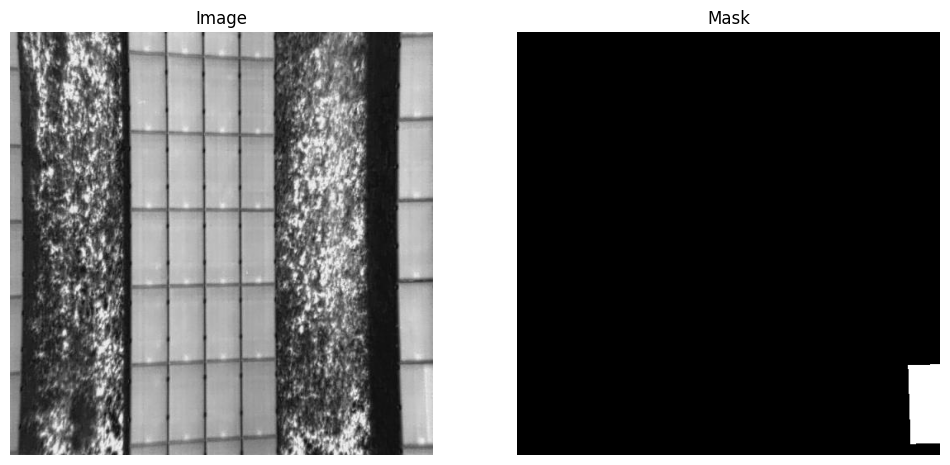

In [6]:
import matplotlib.pyplot as plt
import cv2
import random

# Choose a random sample
sample_image = random.choice(images)
image_path = os.path.join(merged_folder, sample_image)
mask_path = os.path.join(merged_folder, sample_image.replace(".jpg", "_mask.png"))

# Read images
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Convert BGR to RGB for visualization
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()


Image & Mask Statistics

In [7]:
import numpy as np

# Sample 100 images (or all if small dataset)
sample_stats = []
for img_file in images[:100]:
    img_path = os.path.join(merged_folder, img_file)
    img = cv2.imread(img_path)
    sample_stats.append(img.shape)

print("Sample image shapes (H, W, C):")
print(set(sample_stats))


Sample image shapes (H, W, C):
{(512, 512, 3)}


For masks:

In [8]:
mask_values = set()
for mask_file in masks[:100]:
    mask_path = os.path.join(merged_folder, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask_values.update(np.unique(mask))

print("Unique values in masks:", mask_values)


Unique values in masks: {np.uint8(0), np.uint8(1)}


Class Distribution

In [9]:
from collections import Counter

pixel_counts = Counter()

for mask_file in masks:
    mask_path = os.path.join(merged_folder, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    pixel_counts.update(mask.flatten())

print("Pixel counts per class:", pixel_counts)

Pixel counts per class: Counter({np.uint8(0): 30156131, np.uint8(1): 711325})


Resolution Check

In [10]:
heights, widths = [], []

for img_file in images:
    img_path = os.path.join(merged_folder, img_file)
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

print(f"Height: min={min(heights)}, max={max(heights)}, median={np.median(heights)}")
print(f"Width: min={min(widths)}, max={max(widths)}, median={np.median(widths)}")


Height: min=512, max=512, median=512.0
Width: min=512, max=512, median=512.0


Visualization of Class Masks

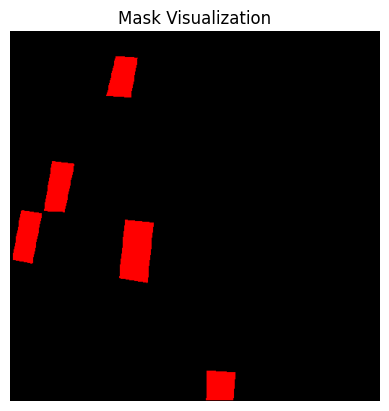

In [11]:
import matplotlib.colors as mcolors

# Example: define a simple color map
colors = [(0,0,0), (255,0,0), (0,255,0), (0,0,255)]  # Black, Red, Green, Blue

mask_rgb = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for i, color in enumerate(colors):
    mask_rgb[mask==i] = color

plt.imshow(mask_rgb)
plt.title("Mask Visualization")
plt.axis("off")
plt.show()


# **Dataset Integrity and Consistency**

a. Image-Mask Pairing

In [12]:
import os

image_files = sorted([f for f in os.listdir(merged_folder) if f.endswith(".jpg")])
mask_files = sorted([f for f in os.listdir(merged_folder) if f.endswith("_mask.png")])

# Check for mismatches
unmatched_images = [f for f in image_files if f.replace(".jpg","_mask.png") not in mask_files]
unmatched_masks = [f for f in mask_files if f.replace("_mask.png",".jpg") not in image_files]

print("Unmatched Images:", unmatched_images)
print("Unmatched Masks:", unmatched_masks)


Unmatched Images: []
Unmatched Masks: []


b. File Naming Patterns

In [13]:
patterns = set([f.split("_")[0] for f in image_files])
print("Distinct image prefixes:", patterns)


Distinct image prefixes: {'gray', 'rgb'}


c. Detect Corrupt or Non-Readable Files

In [14]:
import cv2

corrupt_files = []
for f in image_files:
    try:
        img = cv2.imread(os.path.join(merged_folder, f))
        if img is None:
            corrupt_files.append(f)
    except:
        corrupt_files.append(f)

print("Corrupt images:", corrupt_files)


Corrupt images: []


**2. Advanced Image Analysis**

a. Color / Intensity Distribution

For RGB: Check mean, std of each channel — helps in normalization.

For Gray: Check histogram and dynamic range.

In [15]:
import numpy as np
from tqdm import tqdm

means, stds = [], []

for f in tqdm(image_files[:100]):  # sample 100 for speed
    img = cv2.imread(os.path.join(merged_folder, f))
    means.append(np.mean(img, axis=(0,1)))
    stds.append(np.std(img, axis=(0,1)))

means = np.array(means)
stds = np.array(stds)

print("Mean per channel (RGB):", np.mean(means, axis=0))
print("Std per channel (RGB):", np.mean(stds, axis=0))


100%|██████████| 100/100 [00:04<00:00, 22.30it/s]

Mean per channel (RGB): [103.89386631  99.04206402 136.75711853]
Std per channel (RGB): [57.70533828 55.29357728 60.50642862]


b. Histogram of Pixel Intensities

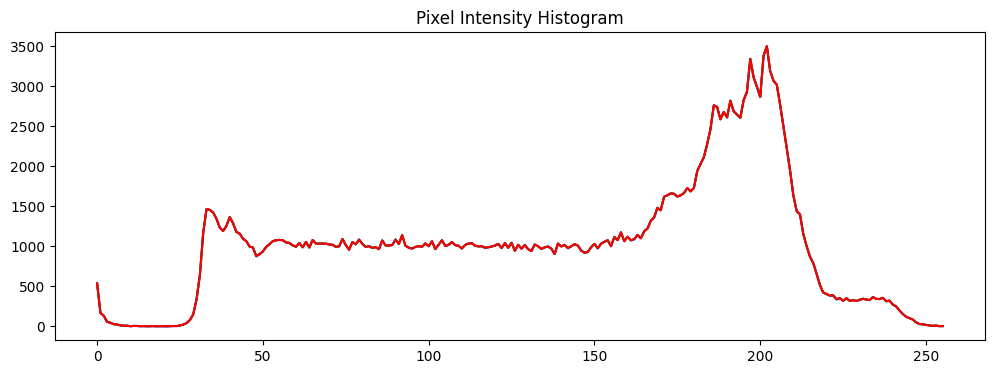

In [16]:
import matplotlib.pyplot as plt

sample_img = cv2.imread(os.path.join(merged_folder, image_files[0]))
colors = ('b','g','r')
plt.figure(figsize=(12,4))
for i,col in enumerate(colors):
    hist = cv2.calcHist([sample_img],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
plt.title("Pixel Intensity Histogram")
plt.show()


c. Aspect Ratio Distribution

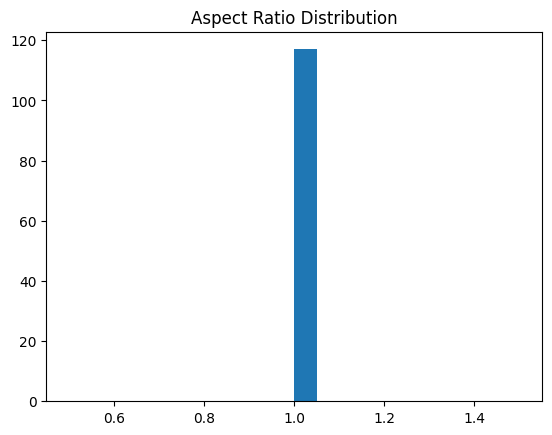

In [17]:
aspect_ratios = [cv2.imread(os.path.join(merged_folder,f)).shape[1] / cv2.imread(os.path.join(merged_folder,f)).shape[0] for f in image_files]
plt.hist(aspect_ratios, bins=20)
plt.title("Aspect Ratio Distribution")
plt.show()


3. Mask Analysis

a. Per-Class Pixel Frequency

Already looked at counts, now compute percentages and imbalance visually.

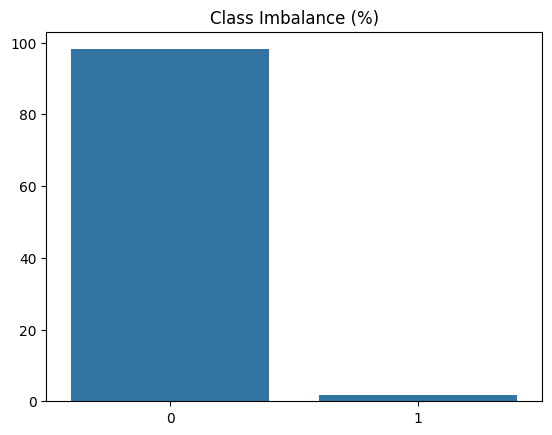

In [18]:
from collections import Counter
import seaborn as sns

pixel_counts = Counter()
for f in mask_files[:100]:  # sample for speed
    mask = cv2.imread(os.path.join(merged_folder, f), cv2.IMREAD_GRAYSCALE)
    pixel_counts.update(mask.flatten())

total_pixels = sum(pixel_counts.values())
class_distribution = {k: v/total_pixels*100 for k,v in pixel_counts.items()}

sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Imbalance (%)")
plt.show()


b. Class Spatial Distribution

Some classes may only appear in corners or certain regions. Plot a heatmap per class:

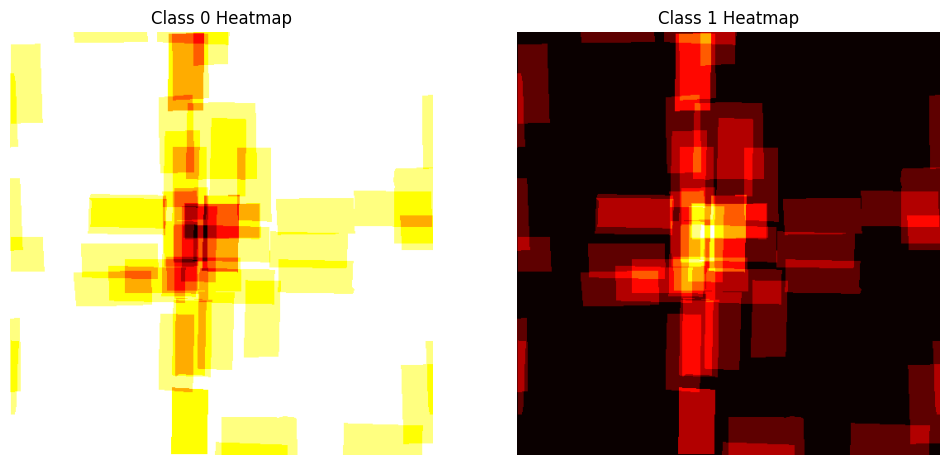

In [19]:
import numpy as np

h, w = cv2.imread(os.path.join(merged_folder, mask_files[0]), cv2.IMREAD_GRAYSCALE).shape
heatmaps = {cls: np.zeros((h,w)) for cls in range(len(pixel_counts))}

for f in mask_files[:50]:
    mask = cv2.imread(os.path.join(merged_folder,f), cv2.IMREAD_GRAYSCALE)
    for cls in heatmaps:
        heatmaps[cls] += (mask==cls).astype(np.int32)

# Normalize and plot
plt.figure(figsize=(12,6))
for cls, hm in heatmaps.items():
    plt.subplot(1,len(heatmaps),cls+1)
    plt.imshow(hm/np.max(hm), cmap='hot')
    plt.title(f"Class {cls} Heatmap")
    plt.axis("off")
plt.show()


c. Mask Complexity

Check the number of unique connected regions per mask (i.e., how fragmented objects are). This is important for network learning difficulty.

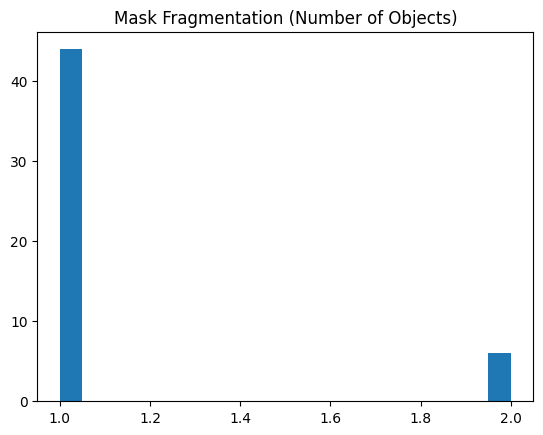

In [20]:
import cv2

from skimage import measure

fragment_counts = []

for f in mask_files[:50]:
    mask = cv2.imread(os.path.join(merged_folder, f), cv2.IMREAD_GRAYSCALE)
    labeled = measure.label(mask)
    fragment_counts.append(np.max(labeled))

plt.hist(fragment_counts, bins=20)
plt.title("Mask Fragmentation (Number of Objects)")
plt.show()


4. Image-Mask Alignment Check

Even if filenames match, misaligned masks ruin segmentation. Compute a quick pixel-wise correlation:

In [21]:
for f in random.sample(image_files, 5):
    img = cv2.imread(os.path.join(merged_folder, f))
    mask = cv2.imread(os.path.join(merged_folder, f.replace(".jpg","_mask.png")), cv2.IMREAD_GRAYSCALE)

    h_img, w_img = img.shape[:2]
    h_mask, w_mask = mask.shape
    print(f"{f}: Image shape {img.shape}, Mask shape {mask.shape}")


gray_0004.jpg: Image shape (512, 512, 3), Mask shape (512, 512)
rgb_0012.jpg: Image shape (512, 512, 3), Mask shape (512, 512)
gray_0002.jpg: Image shape (512, 512, 3), Mask shape (512, 512)
gray_0044.jpg: Image shape (512, 512, 3), Mask shape (512, 512)
gray_0023.jpg: Image shape (512, 512, 3), Mask shape (512, 512)


5. Data Leakage / Redundancy Detection

Compare images to find duplicates. Professionals use perceptual hashing:

In [23]:
!pip install imagehash
from PIL import Image
import imagehash

hashes = {}
duplicates = []

for f in image_files:
    img = Image.open(os.path.join(merged_folder, f))
    h = imagehash.phash(img)
    if h in hashes:
        duplicates.append((f, hashes[h]))
    else:
        hashes[h] = f

print("Duplicates:", duplicates)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.5 MB/s eta 0:00:00
Duplicates: [('gray_0066.jpg', 'gray_0065.jpg'), ('rgb_0038.jpg', 'rgb_0037.jpg')]


In [26]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
merged_folder = "/content/drive/MyDrive/dataset ver_03/merged/train"
train_folder = "/content/drive/MyDrive/dataset ver_03/merged/train_split/train"
val_folder = "/content/drive/MyDrive/dataset ver_03/merged/train_split/val"

# Create directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get all images (exclude masks)
all_images = sorted([f for f in os.listdir(merged_folder) if f.endswith(".jpg")])

# Split images into train/val
train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Function to copy image and its mask
def copy_image_and_mask(filenames, src_folder, dst_folder):
    for img_file in filenames:
        mask_file = img_file.replace(".jpg", "_mask.png")
        # Copy image
        shutil.copy(os.path.join(src_folder, img_file), os.path.join(dst_folder, img_file))
        # Copy mask
        shutil.copy(os.path.join(src_folder, mask_file), os.path.join(dst_folder, mask_file))

# Copy files
copy_image_and_mask(train_images, merged_folder, train_folder)
copy_image_and_mask(val_images, merged_folder, val_folder)

print(f"Train images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")


Train images: 93
Validation images: 24


In [27]:
from google.colab import files
import shutil
import os

# Paths to your datasets
dataset_path = "/content/drive/MyDrive/dataset ver_03"
zip_path = "/content/dataset_ver_03.zip"

# Zip the entire dataset folder
shutil.make_archive("/content/dataset_ver_03", 'zip', dataset_path)

# Download the zip
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>